
Final Project Instructions (Detecting Pneumonia Detection from Chest X-rays)

Pneumonia Detection from Chest X-Rays
Project Overview
In this project, you will apply the skills that you have acquired in this 2D medical imaging course to analyze data from the NIH Chest X-ray Dataset and train a CNN to classify a given chest x-ray for the presence or absence of pneumonia. This project will culminate in a model that can predict the presence of pneumonia with human radiologist-level accuracy that can be prepared for submission to the FDA for 510(k) clearance as software as a medical device. As part of the submission preparation, you will formally describe your model, the data that it was trained on, and a validation plan that meets FDA needs.

You will be provided with the medical images with clinical labels for each image that were extracted from their accompanying radiology reports.

The project will include access to a GPU for fast training of deep learning architecture, as well as access to 112,000 chest x-rays with disease labels acquired from 30,000 patients.

Pneumonia and X-Rays in the World
Chest X-ray exams are one of the most frequent and cost-effective types of medical imaging examinations. Deriving clinical diagnoses from chest X-rays can be challenging, however, even by skilled radiologists.

When it comes to pneumonia, chest X-rays are the best available method for diagnosis. More than 1 million adults are hospitalized with pneumonia and around 50,000 die from the disease every year in the US alone. The high prevalence of pneumonia makes it a good candidate for the development of a deep learning application for two reasons: 1) Data availability in a high enough quantity for training deep learning models for image classification 2) Opportunity for clinical aid by providing higher accuracy image reads of a difficult-to-diagnose disease and/or reduce clinical burnout by performing automated reads of very common scans.

The diagnosis of pneumonia from chest X-rays is difficult for several reasons:

The appearance of pneumonia in a chest X-ray can be very vague depending on the stage of the infection
Pneumonia often overlaps with other diagnoses
Pneumonia can mimic benign abnormalities
For these reasons, common methods of diagnostic validation performed in the clinical setting are to obtain sputum cultures to test for the presence of bacteria or viral bodies that cause pneumonia, reading the patient's clinical history and taking their demographic profile into account, and comparing a current image to prior chest X-rays for the same patient if they are available.

About the Dataset
The dataset provided to you for this project was curated by the NIH specifically to address the problem of a lack of large x-ray datasets with ground truth labels to be used in the creation of disease detection algorithms.

The data is mounted in the Udacity Jupyter GPU workspace provided to you, along with code to load the data. Alternatively, you can download the data from the kaggle website or official NIH website and run it locally. You are STRONGLY recommended to complete the project using the Udacity workspace since the data is huge, and you will need GPU to accelerate the training process.

There are 112,120 X-ray images with disease labels from 30,805 unique patients in this dataset. The disease labels were created using Natural Language Processing (NLP) to mine the associated radiological reports. The labels include 14 common thoracic pathologies:

Atelectasis
Consolidation
Infiltration
Pneumothorax
Edema
Emphysema
Fibrosis
Effusion
Pneumonia
Pleural thickening
Cardiomegaly
Nodule
Mass
Hernia
The biggest limitation of this dataset is that image labels were NLP-extracted so there could be some erroneous labels but the NLP labeling accuracy is estimated to be >90%.

The original radiology reports are not publicly available but you can find more details on the labeling process here.

Dataset Contents:
112,120 frontal-view chest X-ray PNG images in 1024*1024 resolution (under images folder)
Meta data for all images (Data_Entry_2017.csv): Image Index, Finding Labels, Follow-up #, Patient ID, Patient Age, Patient Gender, View Position, Original Image Size and Original Image Pixel Spacing.

Project Steps
1. Exploratory Data Analysis
The first part of this project will involve exploratory data analysis (EDA) to understand and describe the content and nature of the data.

Note that much of the work performed during your EDA will enable the completion of the final component of this project which is focused on documentation of your algorithm for the FDA. This is described in a later section, but some important things to focus on during your EDA may be:

The patient demographic data such as gender, age, patient position,etc. (as it is available)
The x-ray views taken (i.e. view position)
The number of cases including:
number of pneumonia cases,
number of non-pneumonia cases
The distribution of other diseases that are comorbid with pneumonia
Number of disease per patient
Pixel-level assessments of the imaging data for healthy & disease states of interest (e.g. histograms of intensity values) and compare distributions across diseases.
2. Building and Training Your Model
Training and validating Datasets

From your findings in the EDA component of this project, curate the appropriate training and validation sets for classifying pneumonia. Be sure to take the following into consideration:

Distribution of diseases other than pneumonia that are present in both datasets
Demographic information, image view positions, and number of images per patient in each set
Distribution of pneumonia-positive and pneumonia-negative cases in each dataset
Model Architecture

In this project, you will fine-tune an existing CNN architecture to classify x-rays images for the presence of pneumonia. There is no required architecture required for this project, but a reasonable choice would be using the VGG16 architecture with weights trained on the ImageNet dataset. Fine-tuning can be performed by freezing your chosen pre-built network and adding several new layers to the end to train, or by doing this in combination with selectively freezing and training some layers of the pre-trained network.

Image Pre-Processing and Augmentation

You may choose or need to do some amount of preprocessing prior to feeding imagees into your network for training and validating. This may serve the purpose of conforming to your model's architecture and/or for the purposes of augmenting your training dataset for increasing your model performance. When performing image augmentation, be sure to think about augmentation parameters that reflect real-world differences that may be seen in chest X-rays.

Training

In training your model, there are many parameters that can be tweaked to improve performance including:

Image augmentation parameters
Training batch size
Training learning rate
Inclusion and parameters of specific layers in your model
You will be asked to provide descriptions of the methods by which given parameters were chosen in the final FDA documentation.

Performance Assessment

As you train your model, you will monitor its performance over subsequence training epochs. Choose the appropriate metrics upon which to monitor performance. Note that 'accuracy' may not be the most appropriate statistic in this case, depending on the balance or imbalance of your validation dataset, and also depending on the clinical context that you want to use this model in (i.e. can you sacrafice high false positive rate for a low false negative rate?)

Note that detecting pneumonia is hard even for trained expert radiologists, so you should not expect to acheive sky-high performance. This paper describes some human-reader-level F1 scores for detecting pneumonia, and can be used as a reference point for how well your model could perform.

3. Clinical Workflow Integration
The imaging data provided to you for training your model was transformed from DICOM format into .png to help aid in the image pre-processing and model training steps of this project. In the real world, however, the pixel-level imaging data are contained inside of standard DICOM files.

For this project, create a DICOM wrapper that takes in a standard DICOM file and outputs data in the format accepted by your model. Be sure to include several checks in your wrapper for the following:

Proper image acquisition type (i.e. X-ray)
Proper image acquisition orientation (i.e. those present in your training data)
Proper body part in acquisition

4. FDA Submission
For this project, you will complete the following steps that are derived from the FDA's official guidance on both the algorithm description and the algorithm performance assessment. Much of this portion of the project relies on what you did during your EDA, model building, and model training. Use figures and statistics from those earlier parts in completing the following documentation.

1. General Information:
First, provide an Intended Use statement for your model
Then, provide some indications for use that should include:
Target population
When your device could be utilized within a clinical workflow
Device limitations, including diseases/conditions/abnormalities for which the device has been found ineffective and should not be used
Explain how a false positive or false negative might impact a patient
2. Algorithm Design and Function

In this section, describe your fully trained algorithm and the DICOM header checks that you have built around it. Include a flowchart that describes the following:

Any pre-algorithm checks you perform on your DICOM
Any preprocessing steps performed by your algorithm on the original images (e.g. normalization)
Note that this section should not include augmentation
The architecture of the classifier
For each stage of your algorithm, briefly describe the design and function.

3. Algorithm Training

Describe the following parameters of your algorithm and how they were chosen:

Types of augmentation used during training
Batch size
Optimizer learning rate
Layers of pre-existing architecture that were frozen
Layers of pre-existing architecture that were fine-tuned
Layers added to pre-existing architecture
Also describe the behavior of the following throughout training (use visuals to show):

Training loss
Validation loss
Describe the algorithm's final performance after training was complete by showing a precision-recall curve on your validation set.

Finally, report the threshold for classification that you chose and the corresponded F1 score, recall, and precision. Give one or two sentences of explanation for why you chose this threshold value.

4. Databases

For the database of patient data used, provide specific information about the training and validation datasets that you curated separately, including:

Size of the dataset
The number of positive cases and the its radio to the number of negative cases
The patient demographic data (as it is available)
The radiologic techniques used and views taken
The co-occurrence frequencies of pneumonia with other diseases and findings

5. Ground Truth

The methodology used to establish the ground truth can impact reported performance. Describe how the NIH created the ground truth for the data that was provided to you for this project. Describe the benefits and limitations of this type of ground truth.

6. FDA Validation Plan

You will simply describe how a FDA Validation Plan would be conducted for your algorithm, rather than actually performing the assessment. Describe the following:

The patient population that you would request imaging data from from your clinical partner. Make sure to include:

Age ranges
Sex
Type of imaging modality
Body part imaged
Prevalence of disease of interest
Any other diseases that should be included or excluded as comorbidities in the population
Provide a short explanation of how you would obtain an optimal ground truth

Provide a performance standard that you choose based on this paper: Link: https://arxiv.org/pdf/1711.05225


In [ ]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import os
from glob import glob
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns

##Import any other packages you may need here
import pydicom as pydicom


EDA is open-ended, and it is up to you to decide how to look at different ways to slice and dice your data. A good starting point is to look at the requirements for the FDA documentation in the final part of this project to guide (some) of the analyses you do. 

This EDA should also help to inform you of how pneumonia looks in the world. E.g. what other types of diseases it's commonly found with, how often it is found, what ages it affects, etc. 

Note that this NIH dataset was not specifically acquired for pneumonia. So, while this is a representation of 'pneumonia in the world,' the prevalence of pneumonia may be different if you were to take only chest x-rays that were acquired in an ER setting with suspicion of pneumonia. 

Perform the following EDA:
* The patient demographic data such as gender, age, patient position,etc. (as it is available)
* The x-ray views taken (i.e. view position)
* The number of cases including: 
    * number of pneumonia cases,
    * number of non-pneumonia cases
* The distribution of other diseases that are comorbid with pneumonia
* Number of disease per patient 
* Pixel-level assessments of the imaging data for healthy & disease states of interest (e.g. histograms of intensity values) and compare distributions across diseases.

Note: use full NIH data to perform the first a few EDA items and use `sample_labels.csv` for the pixel-level assassements. 

Also, **describe your findings and how will you set up the model training based on the findings.**

In [8]:
## Below is some helper code to read data for you.
## Load NIH data
all_xray_df = pd.read_csv('Data_Entry_2017_v2020.csv')
all_xray_df.sample(3)

## Load 'sample_labels.csv' data for pixel level assessments
sample_df = pd.read_csv('sample_labels.csv')
sample_df.sample(3)

,Image Index,Finding Labels,Follow-up #,Patient ID,Patient Age,Patient Gender,View Position,OriginalImageWidth,OriginalImageHeight,OriginalImagePixelSpacing_x,OriginalImagePixelSpacing_y
880,00004639_002.png,No Finding,2,4639,038Y,F,PA,2750,2573,0.143,0.143
3977,00019643_025.png,No Finding,25,19643,031Y,F,AP,2500,2048,0.168,0.168
2854,00014140_002.png,No Finding,2,14140,046Y,M,AP,2500,2048,0.168,0.168


In [ ]:
# Printing column names for both NIH metadata and sample pixel-level data

print("Columns in Data_Entry_2017_v2020.csv:")
print(all_xray_df.columns.tolist())

print("\nColumns in sample_labels.csv:")
print(sample_df.columns.tolist())

Columns in Data_Entry_2017_v2020.csv:
['Image Index', 'Finding Labels', 'Follow-up #', 'Patient ID', 'Patient Age', 'Patient Sex', 'View Position', 'OriginalImage[Width', 'Height]', 'OriginalImagePixelSpacing[x', 'y]']

Columns in sample_labels.csv:
['Image Index', 'Finding Labels', 'Follow-up #', 'Patient ID', 'Patient Age', 'Patient Gender', 'View Position', 'OriginalImageWidth', 'OriginalImageHeight', 'OriginalImagePixelSpacing_x', 'OriginalImagePixelSpacing_y']


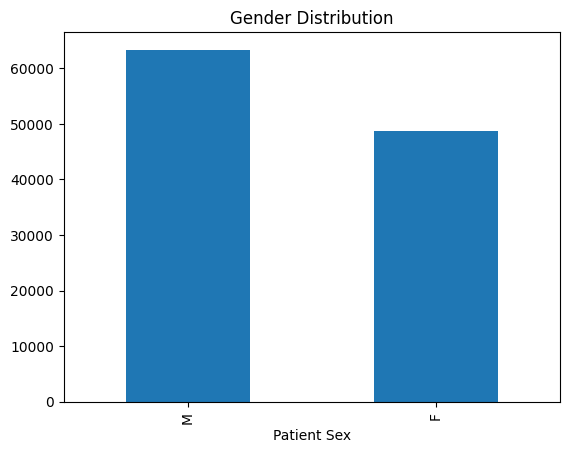

In [ ]:
#EDA: Gender Distribution
all_xray_df['Patient Sex'].value_counts().plot(kind='bar', title='Gender Distribution')
plt.show()

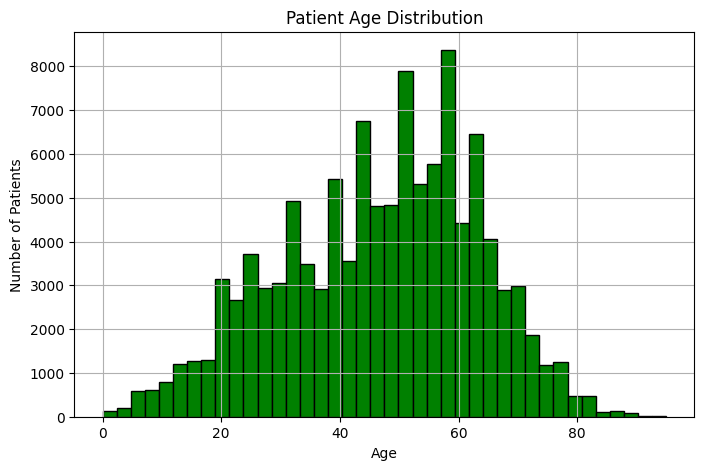

In [ ]:
# EDA: Plotting age distribution of patients
plt.figure(figsize=(8, 5))
all_xray_df['Patient Age'].hist(bins=40, color='green', edgecolor='black')
plt.title('Patient Age Distribution')
plt.xlabel('Age')
plt.ylabel('Number of Patients')
plt.show()


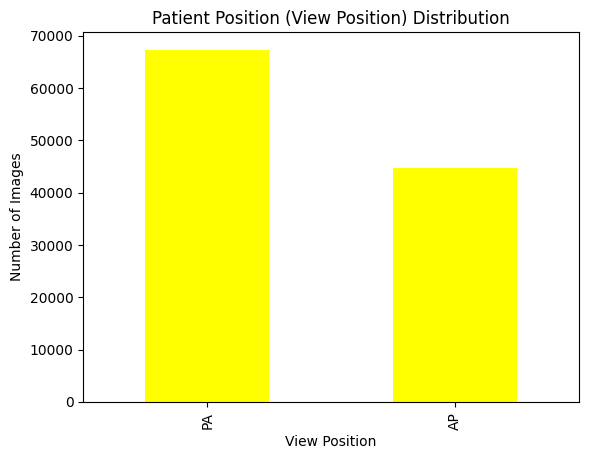

In [16]:
# EDA: Plotting the distribution of "View Position" (Patient Position) with yellow bars
all_xray_df['View Position'].value_counts().plot(
    kind='bar', 
    color='yellow', 
    title='Patient Position (View Position) Distribution'
)
plt.xlabel('View Position')
plt.ylabel('Number of Images')
plt.show()


Number of pneumonia cases: 1431
Number of non-pneumonia cases: 110689


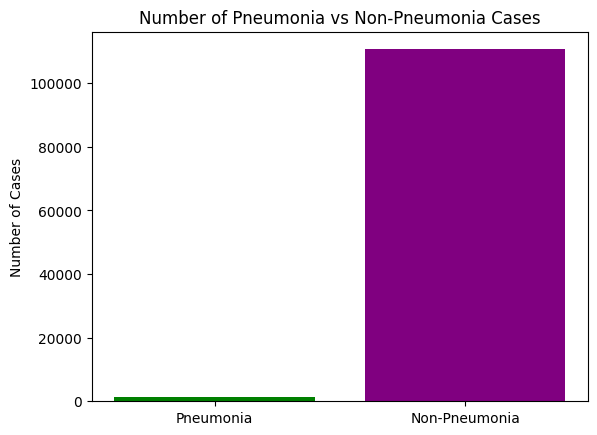

In [20]:
# EDA: Number of pneumonia and non-pneumonia cases

# Create a boolean mask for pneumonia
is_pneumonia = all_xray_df['Finding Labels'].str.contains('Pneumonia', case=False)

num_pneumonia = is_pneumonia.sum()
num_non_pneumonia = (~is_pneumonia).sum()

print(f"Number of pneumonia cases: {num_pneumonia}")
print(f"Number of non-pneumonia cases: {num_non_pneumonia}")

# Plotting
plt.bar(['Pneumonia', 'Non-Pneumonia'], [num_pneumonia, num_non_pneumonia], color=['green', 'purple'])
plt.title('Number of Pneumonia vs Non-Pneumonia Cases')
plt.ylabel('Number of Cases')
plt.show()

#Add a count for each column as a label
def add_count_labels(ax):
    for p in ax.patches:
        ax.annotate(f'{int(p.get_height())}', 
                    (p.get_x() + p.get_width() / 2., p.get_height()), 
                    ha='center', va='bottom')

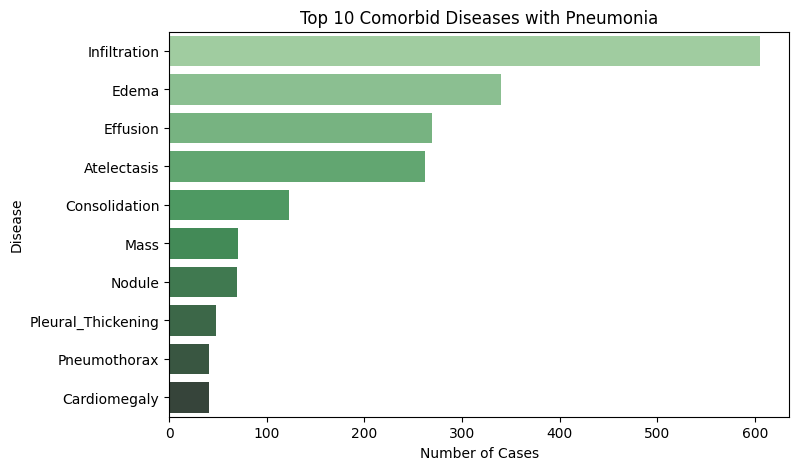

In [ ]:
from collections import Counter

# Filter for pneumonia cases
pneumonia_cases = all_xray_df[is_pneumonia]

# Split 'Finding Labels' and count comorbidities (excluding 'Pneumonia')
comorbidities = []
for labels in pneumonia_cases['Finding Labels']:
    diseases = [d.strip() for d in labels.split('|') if d.strip().lower() != 'pneumonia']
    comorbidities.extend(diseases)

comorbidity_counts = Counter(comorbidities)
top_comorbid = comorbidity_counts.most_common(10)

# Convert to DataFrame for plotting
comorbidity_df = pd.DataFrame(top_comorbid, columns=['Disease', 'Count'])

# Plot
plt.figure(figsize=(8,5))
sns.barplot(data=comorbidity_df, x='Count', y='Disease', hue='Disease', dodge=False, palette='Greens_d')
plt.title('Top 10 Comorbid Diseases with Pneumonia')
plt.legend([],[], frameon=False)  # Hide legend since hue is just for color
plt.xlabel('Number of Cases')
plt.ylabel('Disease')
plt.show()

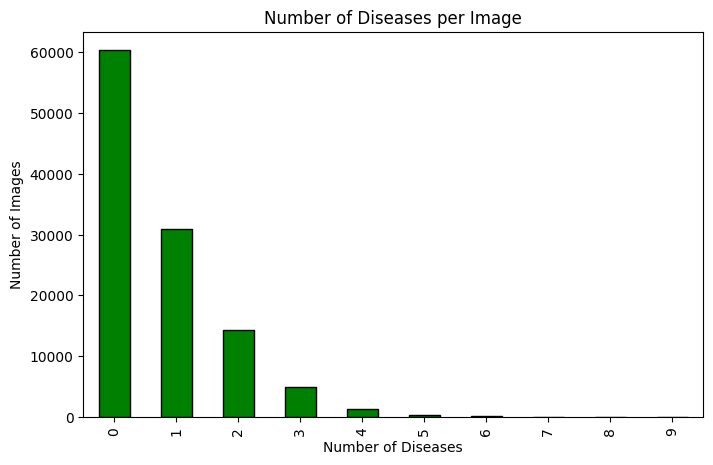

In [29]:
#EDA: Plotting the number of diseases per patient
# Count number of diseases per image (excluding 'No Finding')
all_xray_df['Num Diseases'] = all_xray_df['Finding Labels'].apply(
    lambda x: 0 if x == 'No Finding' else len(x.split('|'))
)

plt.figure(figsize=(8,5))
all_xray_df['Num Diseases'].value_counts().sort_index().plot(
    kind='bar', color='green', edgecolor='black'
)
plt.title('Number of Diseases per Image')
plt.xlabel('Number of Diseases')
plt.ylabel('Number of Images')
plt.show()

In [ ]:
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt
import os
from glob import glob
import pandas as pd

# Load the NIH data and image paths
all_xray_df = pd.read_csv('/data/Data_Entry_2017.csv')
all_image_paths = {os.path.basename(x): x for x in 
                   glob(os.path.join('/data','images*', '*', '*.png'))}
print('Scans found:', len(all_image_paths), ', Total Headers', all_xray_df.shape[0])
all_xray_df['path'] = all_xray_df['Image Index'].map(all_image_paths.get)
all_xray_df = all_xray_df.dropna(subset=['path'])  # Drop rows without image path

# Get paths for different categories
healthy_paths = all_xray_df[all_xray_df['Finding Labels'] == 'No Finding']['path'].values
pneumonia_paths = all_xray_df[all_xray_df['Finding Labels'].str.contains('Pneumonia')]['path'].values
other_disease_paths = all_xray_df[
    (all_xray_df['Finding Labels'] != 'No Finding') & 
    (~all_xray_df['Finding Labels'].str.contains('Pneumonia'))
]['path'].values

# Sample images (using fewer samples for faster processing)
healthy_samples = healthy_paths[:50]
pneumonia_samples = pneumonia_paths[:50]
other_disease_samples = other_disease_paths[:50]

def get_pixel_values(image_paths):
    pixels = []
    for path in image_paths:
        try:
            # Using PIL instead of cv2
            img = np.array(Image.open(path).convert('L'))  # 'L' mode for grayscale
            pixels.append(img.flatten())
        except Exception as e:
            print(f"Error processing {path}: {e}")
            continue
    return np.concatenate(pixels) if pixels else np.array([])

# Get pixel values for each category
healthy_pixels = get_pixel_values(healthy_samples)
pneumonia_pixels = get_pixel_values(pneumonia_samples)
other_disease_pixels = get_pixel_values(other_disease_samples)

# Create visualization
plt.figure(figsize=(12, 6))

if healthy_pixels.size > 0:
    plt.hist(healthy_pixels, bins=50, alpha=0.5, 
             label='Healthy', color='green', density=True)
if pneumonia_pixels.size > 0:
    plt.hist(pneumonia_pixels, bins=50, alpha=0.5, 
             label='Pneumonia', color='red', density=True)
if other_disease_pixels.size > 0:
    plt.hist(other_disease_pixels, bins=50, alpha=0.5, 
             label='Other Diseases', color='blue', density=True)

plt.title('Pixel Intensity Distribution Across Different Categories')
plt.xlabel('Pixel Intensity')
plt.ylabel('Density')
plt.legend()
plt.grid(True, alpha=0.3)
plt.show()

# Print some basic statistics
for name, pixels in [("Healthy", healthy_pixels), 
                    ("Pneumonia", pneumonia_pixels), 
                    ("Other Diseases", other_disease_pixels)]:
    if pixels.size > 0:
        print(f"\n{name} Statistics:")
        print(f"Mean pixel intensity: {pixels.mean():.2f}")
        print(f"Std pixel intensity: {pixels.std():.2f}")
        print(f"Min pixel intensity: {pixels.min():.2f}")
        print(f"Max pixel intensity: {pixels.max():.2f}")